# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "CF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'CF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_CF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.737  1  1.429 0.233 0.007   
                             age        0.092  1  0.178 0.674 0.001   
                             Kiel       1.914  1  3.711 0.056 0.019   
                             Magdeburg  4.024  1  7.801 0.006 0.039   
                             Sweden     6.605  1 12.804 0.000 0.063   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.111  1  0.108 0.743 0.001   
                             age        1.028  1  1.004 0.318 0.005   
                             Kiel       0.079  1  0.077 0.782 0.000   
                             Magdeburg  2.934  1  2.865 0.092 0.015   
                             Sweden    14.690  1 14.345 0.000 0.070   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.632  0.387    False  
                             age               0.172  0.788    False  
                             Kiel              1.255  0.132    False  
                             Magdeburg         2.240  0.021     True  
                             Sweden            3.358  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.129  0.837    False  
                             age               0.498  0.482    False  
                             Kiel              0.107  0.865    False  
                             Magdeburg         1.035  0.195    False  
                             Sweden            3.691  0.001     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      CF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.089  1  7.578 0.006 0.038   
                             age        0.006  1  0.042 0.838 0.000   
                             Kiel       0.309  1  2.147 0.144 0.011   
                             Magdeburg  0.552  1  3.838 0.052 0.020   
                             Sweden     1.859  1 12.933 0.000 0.063   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.506  1  3.154 0.077 0.016   
                             age        0.888  1  1.858 0.174 0.010   
                             Kiel       2.254  1  4.718 0.031 0.024   
                             Magdeburg  1.961  1  4.105 0.044 0.021   
                             Sweden    23.975  1 50.189 0.000 0.208   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.189  0.019     True  
                             age               0.077  0.893    False  
                             Kiel              0.840  0.244    False  
                             Magdeburg         1.288  0.106    False  
                             Sweden            3.386  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.112  0.148    False  
                             age               0.758  0.283    False  
                             Kiel              1.507  0.070    False  
                             Magdeburg         1.355  0.094    False  
                             Sweden           10.583  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     CF                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.006         2.189  0.019     True   
                             Kiel      0.144         0.840  0.244    False   
                             Magdeburg 0.052         1.288  0.106    False   
                             Sweden    0.000         3.386  0.002     True   
                             age       0.838         0.077  0.893    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.077         1.112  0.148    False   
                             Kiel      0.031         1.507  0.070    False   
                             Magdeburg 0.044         1.355  0.094    False   
                             Sweden    0.000        10.583  0.000     True   
                             age       0.174         0.758  0.283    False   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.233         0.632  0.387    False  
                             Kiel      0.056         1.255  0.132    False  
                             Magdeburg 0.006         2.240  0.021     True  
                             Sweden    0.000         3.358  0.002     True  
                             age       0.674         0.172  0.788    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.743         0.129  0.837    False  
                             Kiel      0.782         0.107  0.865    False  
                             Magdeburg 0.092         1.035  0.195    False  
                             Sweden    0.000         3.691  0.001     True  
                             age       0.318         0.498  0.482    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'CF': 'CF', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.225         3.277     0.279     0.259         2.486     0.335
std       0.293         6.202     0.320     0.302         5.282     0.330
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.001         0.408     0.002     0.004         0.335     0.015
50%       0.062         1.210     0.123     0.117         0.932     0.234
75%       0.391         3.278     0.521     0.463         2.439     0.617
max       1.000        85.930     1.000     1.000       142.049     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_49431/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        CF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.006         2.189   
A0A024R0T9;K7ER74;P02655                           AD     0.032         1.499   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.471         0.327   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.270         0.568   
A0A075B6H7                                         AD     0.006         2.210   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.327         0.486   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.514         0.289   
S4R3U6                                             AD     0.077         1.112   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.019     True   
A0A024R0T9;K7ER74;P02655                           AD      0.071    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.597    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.397    False   
A0A075B6H7                                         AD      0.018     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.284    False   
Q9Y6X5                                             AD      0.458    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.157    False   
Q9Y6Y9                                             AD      0.636    False   
S4R3U6                                             AD      0.148    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.233         0.632   
A0A024R0T9;K7ER74;P02655                           AD     0.052         1.283   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.082         1.084   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.470         0.328   
A0A075B6H7                                         AD     0.223         0.652   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.033         1.487   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.709         0.150   
S4R3U6                                             AD     0.743         0.129   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.387    False  
A0A024R0T9;K7ER74;P02655                           AD      0.125    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.179    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.623    False  
A0A075B6H7                                         AD      0.375    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.240         1.590     0.300     0.253         1.413     0.335
std       0.294         1.829     0.316     0.291         1.663     0.316
min       0.000         0.000     0.000     0.000         0.002     0.000
25%       0.007         0.383     0.020     0.011         0.357     0.037
50%       0.086         1.063     0.162     0.122         0.915     0.241
75%       0.414         2.151     0.544     0.439         1.943     0.597
max       0.999        19.702     0.999     0.996        24.061     0.997

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,CF,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,950,1031


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

CF                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.006         2.189  0.019   
A0A024R0T9;K7ER74;P02655                           0.032         1.499  0.071   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.471         0.327  0.597   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.270         0.568  0.397   
A0A075B6H7                                         0.006         2.210  0.018   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.284   
Q9Y6X5                                             0.327         0.486  0.458   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.157   
Q9Y6Y9                                             0.514         0.289  0.636   
S4R3U6                                             0.077         1.112  0.148   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.233   
A0A024R0T9;K7ER74;P02655                              False 0.052   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.082   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.470   
A0A075B6H7                                             True 0.223   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.033   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.709   
S4R3U6                                                False 0.743   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.632  0.387   
A0A024R0T9;K7ER74;P02655                                   1.283  0.125   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.084  0.179   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.328  0.623   
A0A075B6H7                                                 0.652  0.375   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.315   
Q9Y6X5                                                     1.487  0.087   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.181   
Q9Y6Y9                                                     0.150  0.813   
S4R3U6                                                     0.129  0.837   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
CF (no)  - PI (no)    898
CF (yes) - PI (yes)   338
CF (yes) - PI (no)    133
CF (no)  - PI (yes)    52
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_49431/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


CF                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.006         2.189  0.019     True 0.233   
A0A075B6H7                   0.006         2.210  0.018     True 0.223   
A0A075B6I0                   0.001         3.135  0.003     True 0.017   
A0A075B6J9                   0.009         2.030  0.026     True 0.073   
A0A075B6R2                   0.001         3.247  0.002     True 0.314   
...                            ...           ...    ...      ...   ...   
Q9UJ14                       0.021         1.681  0.050    False 0.011   
Q9UNW1                       0.599         0.222  0.709    False 0.012   
Q9UP79                       0.000         4.642  0.000     True 0.149   
Q9UQ52                       0.001         3.109  0.003     True 0.059   
Q9Y6C2                       0.017         1.772  0.042     True 0.949   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.632  0.387    False       186  
A0A075B6H7                           0.652  0.375    False        91  
A0A075B6I0                           1.771  0.052    False       194  
A0A075B6J9                           1.134  0.163    False       156  
A0A075B6R2                           0.502  0.478    False       164  
...                                    ...    ...      ...       ...  
Q9UJ14                               1.978  0.035     True       169  
Q9UNW1                               1.928  0.038     True       171  
Q9UP79                               0.826  0.279    False       135  
Q9UQ52                               1.231  0.138    False       188  
Q9Y6C2                               0.023  0.971    False       119  

[185 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,CF,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.019,0.387,186,CF (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.071,0.125,195,CF (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.597,0.179,174,CF (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.397,0.623,196,CF (no) - PI (no)
A0A075B6H7,0.018,0.375,91,CF (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.284,0.315,197,CF (no) - PI (no)
Q9Y6X5,0.458,0.087,173,CF (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.157,0.181,197,CF (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,CF,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P52758,0.963,0.001,119,CF (no) - PI (yes),0.962
P48745,0.009,0.952,180,CF (yes) - PI (no),0.943
O00187;O00187-2,0.032,0.974,119,CF (yes) - PI (no),0.942
O60565,0.002,0.933,81,CF (yes) - PI (no),0.931
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2,0.000,0.929,134,CF (yes) - PI (no),0.929
...,...,...,...,...,...
Q9NX62,0.045,0.055,197,CF (yes) - PI (no),0.010
K7ERI9;P02654,0.050,0.041,196,CF (no) - PI (yes),0.010
P00740;P00740-2,0.043,0.053,197,CF (yes) - PI (no),0.009


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_1_CF


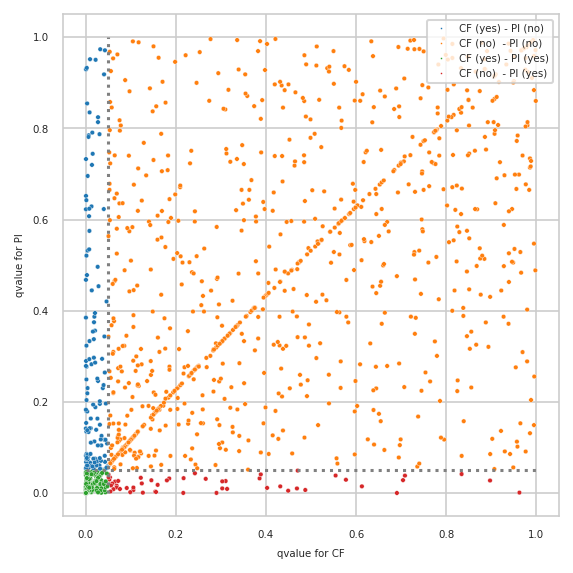

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_2_CF


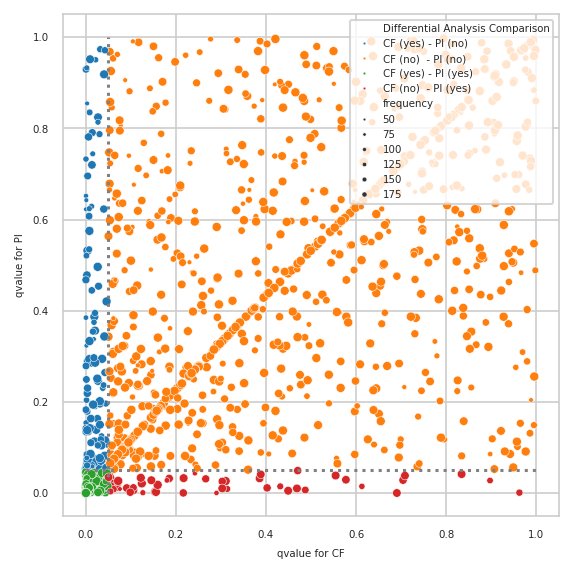

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN1,ENSP00000326366,5.000
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
FRAT2,ENSP00000360058,0.681
CLEC4M,ENSP00000316228,0.681
DSC2,ENSP00000280904,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/3fa5fb1d5dd2a817778dc1597a6471cf_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out